In [5]:
import OGRePy as gr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp


from scipy.integrate import solve_ivp

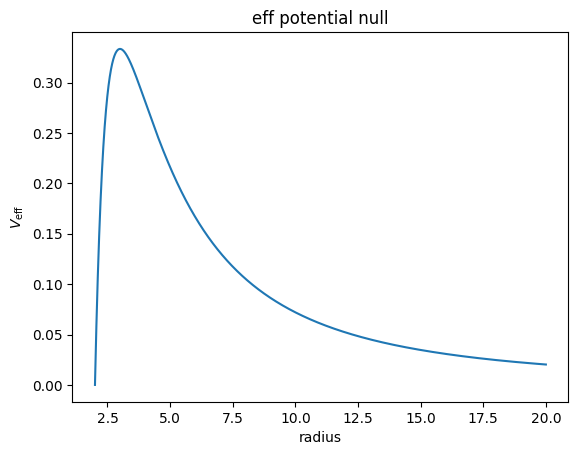

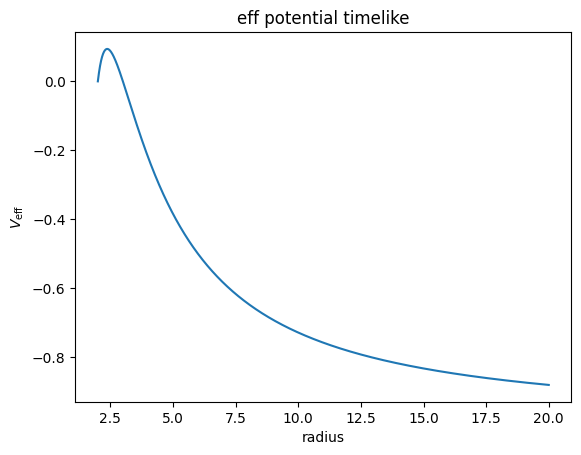

In [7]:




M = 1.0 #BH mass
sigma = 0 #null geodesic
E = 1.0 #particle energy
L = 3.0 #angular momentum of particle

#metric functions
def f(r, M):
    return 1 - 2 * M / r

def g(r, M):
    return (1 - 2 * M / r)**(-1)

def h(r):
    return r ** 2


def V_eff(r, L, simga=0):
    return f(r,M) * -(sigma - (L**2*h(r)**(-1)))


r_s = 2*M #schwarzschild radius

r_list = np.linspace(r_s, 10*r_s, 10000)

#calculate the effective potential
V_eff_list = [V_eff(r, L) for r in r_list]

#plot effective potential with sigma=0
plt.plot(r_list, V_eff_list)
plt.xlabel('radius')
plt.ylabel(r'$V_{\rm eff}$')
plt.title('eff potential null')
plt.show()

#plot effective potential with sigma=0
sigma=1
V_eff_list_sigma1 = [V_eff(r, L) for r in r_list]
plt.plot(r_list, V_eff_list_sigma1)
plt.xlabel('radius')
plt.ylabel(r'$V_{\rm eff}$')
plt.title('eff potential timelike')
plt.show()


In [3]:
! python --version


Python 3.12.3


In [ ]:
import sympy as sp

def find_extrema(equation, variable_name='r', constants=None):
    """
    Determines the maxima and minima of an equation with one variable and optional constants.
    
    Args:
    equation (str): A string representation of the equation.
    variable_name (str): The variable in the equation. Defaults to 'r'.
    constants (list): List of constants used in the equation.

    Returns:
    dict: A dictionary containing critical points, maxima, minima, and saddle points.
    """
    # Define the variable
    r = sp.symbols(variable_name, real=True)  # Ensure r is treated as a real number
    
    # Define constants as symbolic variables if provided
    if constants:
        const_symbols = {const: sp.symbols(const, real=True) for const in constants}
    else:
        const_symbols = {}

    # Parse the equation into a SymPy expression
    expr = sp.sympify(equation, locals=const_symbols)
    
    # Compute the first derivative
    first_derivative = sp.diff(expr, r)
    
    # Find critical points by solving f'(r) = 0 using solveset (preferred over solve)
    critical_points = sp.solveset(first_derivative, r, domain=sp.S.Reals)
    
    # Compute the second derivative
    second_derivative = sp.diff(first_derivative, r)
    
    # Classify critical points using the second derivative test
    extrema = {"critical_points": [], "maxima": [], "minima": [], "saddle_points": []}

    # Process critical points
    if critical_points.is_FiniteSet:  # Ensure the result is a finite set
        for point in critical_points:
            second_derivative_at_point = second_derivative.subs(r, point)
            if second_derivative_at_point.is_number:
                if second_derivative_at_point > 0:
                    extrema["minima"].append(point)
                elif second_derivative_at_point < 0:
                    extrema["maxima"].append(point)
                else:
                    extrema["saddle_points"].append(point)
            extrema["critical_points"].append(point)

    return extrema

# Define the constants
constants = ['M=1', 'L=3', 'sigma=0']  # M, L, and sigma are constants

# Define the equation
equation = "(1 - 2 * M / r) * -(sigma - (L**2 / r**2))"  # Simplified fraction notation




# Call the function
results = find_extrema(equation, constants=constants)

# Print the results
print("Critical Points:", results["critical_points"])
print("Maxima:", results["maxima"])
print("Minima:", results["minima"])
print("Saddle Points:", results["saddle_points"])




In [ ]:
import sympy as sp

def find_extrema(equation, variable_name='r', constants=None):
    """
    Determines the maxima and minima of an equation with one variable and optional constants.
    
    Args:
    equation (str): A string representation of the equation.
    variable_name (str): The variable in the equation. Defaults to 'r'.
    constants (list): List of constants used in the equation.

    Returns:
    dict: A dictionary containing critical points, maxima, minima, and saddle points.
    """
    # Define the variable
    r = sp.symbols(variable_name, real=True)  # Ensure r is treated as a real number
    
    # Define constants as symbolic variables if provided
    if constants:
        const_symbols = {const: sp.symbols(const, real=True) for const in constants}
    else:
        const_symbols = {}

    # Parse the equation into a SymPy expression
    expr = sp.sympify(equation, locals=const_symbols)
    
    # Compute the first derivative
    first_derivative = sp.diff(expr, r)
    
    # Find critical points by solving f'(r) = 0 using solveset (preferred over solve)
    critical_points = sp.solveset(first_derivative, r, domain=sp.S.Reals)
    
    # Compute the second derivative
    second_derivative = sp.diff(first_derivative, r)
    
    # Classify critical points using the second derivative test
    extrema = {"critical_points": [], "maxima": [], "minima": [], "saddle_points": []}

    # Process critical points
    if critical_points.is_FiniteSet:  # Ensure the result is a finite set
        for point in critical_points:
            second_derivative_at_point = second_derivative.subs(r, point)
            if second_derivative_at_point.is_number:
                if second_derivative_at_point > 0:
                    extrema["minima"].append(point)
                elif second_derivative_at_point < 0:
                    extrema["maxima"].append(point)
                else:
                    extrema["saddle_points"].append(point)
            extrema["critical_points"].append(point)

    return extrema

# Define the constants
constants = ['M', 'L', 'sigma']  # M, L, and sigma are constants

# Define the equation as a string
equation = "(1 - 2 * M / r) * -(sigma - (L**2 / r**2))"

# Substitute values for M, L, sigma before solving
numerical_equation = sp.sympify(equation, locals={'M': 1, 'L': 3, 'sigma': 0})

# Call the function with the numerical equation
results = find_extrema(str(numerical_equation))

# Print the results
print("Critical Points:", results["critical_points"])
print("Maxima:", results["maxima"])
print("Minima:", results["minima"])
print("Saddle Points:", results["saddle_points"])